<a href="https://colab.research.google.com/github/issacridhin/Speech_Processing/blob/main/2348546_Lab5_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Alignment and Normalization**

- The core process in Linear Time Normalization, or LTN involves adjusting the time axis of a signal. This is done by mapping the time points of the original signal to a new set of time points that correspond to the desired length.
- For example, if one signal is longer than another, LTN can compress the longer signal to match the shorter one or vice versa.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
#signal
s1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Normal pace
s2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  #Signal 2: Slower pace

### **a.** Visualization

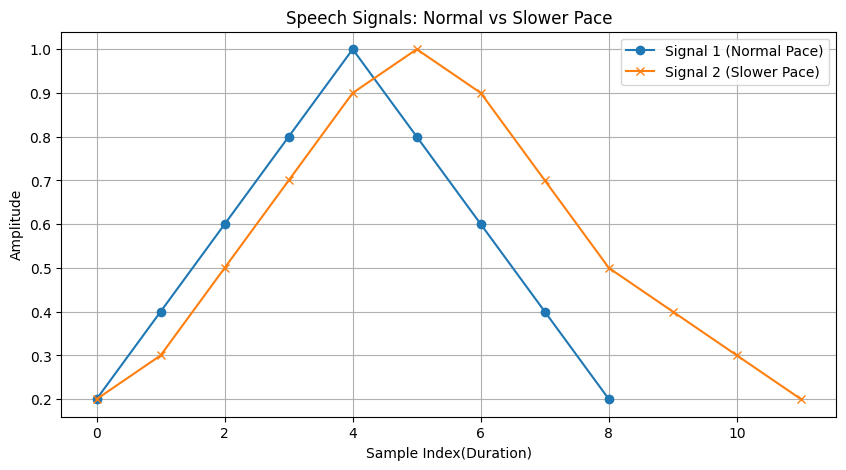

In [ ]:
#plotting  the signals together
plt.figure(figsize=(10, 5))
plt.plot(s1, label="Signal 1 (Normal Pace)", marker='o')
plt.plot(s2, label="Signal 2 (Slower Pace)", marker='x')
plt.title("Speech Signals: Normal vs Slower Pace")
plt.xlabel("Sample Index(Duration)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

### **b.** Linear Time Normalization

In [ ]:
#indicesfor the signal
ind1 = np.arange(len(s1))
ind2 = np.linspace(0, len(s2) - 1, num=len(s1))

In [ ]:
#interpolating Signal 2 to align with Signal 1's length
interpolator = interp1d(np.arange(len(s2)), s2, kind='linear')
s2_norm = interpolator(ind2)

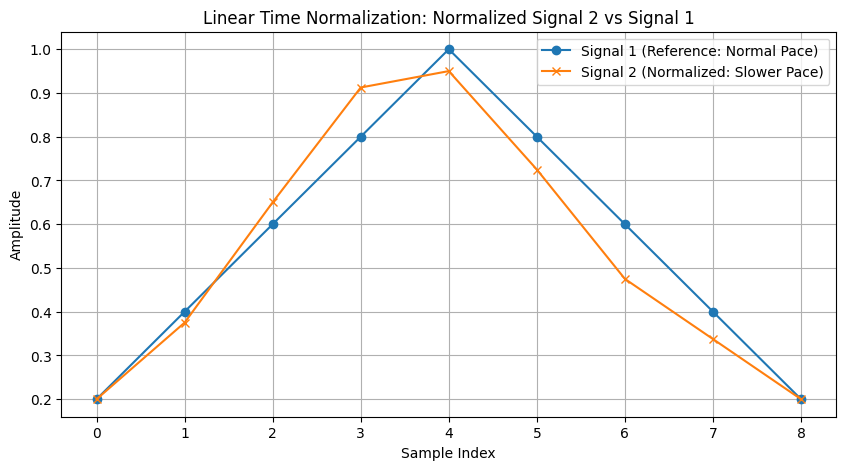

In [ ]:
# Plot the original Signal 1 and normalized Signal 2 for comparison
plt.figure(figsize=(10, 5))
plt.plot(s1, label="Signal 1 (Reference: Normal Pace)", marker='o')
plt.plot(s2_norm, label="Signal 2 (Normalized: Slower Pace)", marker='x')
plt.title("Linear Time Normalization: Normalized Signal 2 vs Signal 1")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

- To preserve the waveform structure, interpolation techniques are often used. Interpolation helps to estimate the values of the signals at new time points, ensuring that the transitions and key features of the original signals are not lost.

### **c.** Computing te alignment btwn the normalized and other signal

In [ ]:
alignment_path = [(i, j) for i, j in zip(ind1, range(len(s2_norm)))]
print("Alignment Path:")
for i, j in alignment_path:
    print(f"Signal 1 Index: {i}, Signal 2 Index: {j}")

Alignment Path:
Signal 1 Index: 0, Signal 2 Index: 0
Signal 1 Index: 1, Signal 2 Index: 1
Signal 1 Index: 2, Signal 2 Index: 2
Signal 1 Index: 3, Signal 2 Index: 3
Signal 1 Index: 4, Signal 2 Index: 4
Signal 1 Index: 5, Signal 2 Index: 5
Signal 1 Index: 6, Signal 2 Index: 6
Signal 1 Index: 7, Signal 2 Index: 7
Signal 1 Index: 8, Signal 2 Index: 8


### **d.** Plot the alignment path

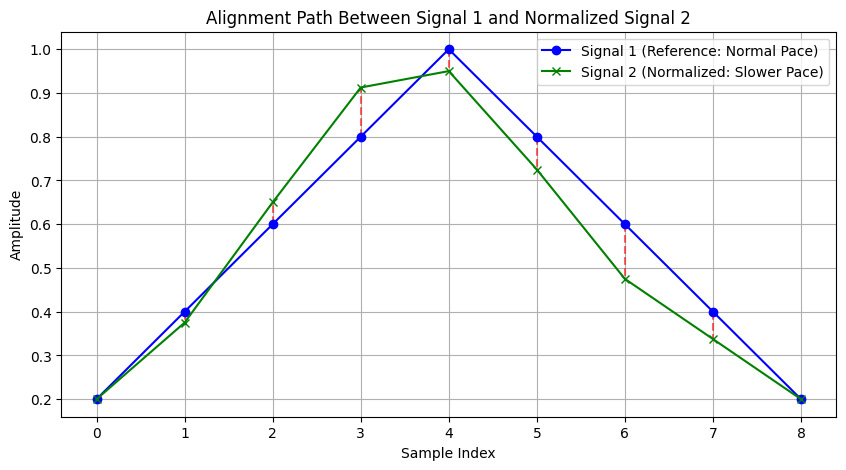

In [ ]:
plt.figure(figsize=(10, 5))
for x1, x2 in alignment_path:
    plt.plot([x1, x2], [s1[x1], s2_norm[x2]], 'r--', alpha=0.6)
plt.plot(s1, label="Signal 1 (Reference: Normal Pace)", marker='o', color='b')
plt.plot(s2_norm, label="Signal 2 (Normalized: Slower Pace)", marker='x', color='g')
plt.title("Alignment Path Between Signal 1 and Normalized Signal 2")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

### **e.** Inference

- Linear Time Normalization (LTN) aligns the two signals by adjusting the slower-paced signal to match the length of the normal-paced signal.
- The alignment ensures that the structure of the speech pattern is preserved while stretching or compressing the slower signal.
- This is evident from the alignment path, where each sample in Signal 1 corresponds to a specific sample in the normalized Signal 2.